# CmpE 482 - Spring2021 - Assignment 1

In [1]:
!which python

/snap/jupyter/6/bin/python


**Student ID:** 2016400099 \
**Name Surname:** Emre Girgin \
**Date:** 03.04.2021

## Question 1:

In [2]:
import numpy as np

In [2]:
X = np.random.standard_normal(size=(5,5))
X

array([[ 1.31718001, -0.41530465, -0.1874096 , -0.17651112, -0.82940197],
       [ 1.45051415,  0.49749881, -0.44835019, -0.95435331, -0.15280355],
       [ 0.1511966 ,  0.00339588,  0.76377837,  0.56928527,  1.44110529],
       [ 0.34053024,  0.25333274, -1.30403334, -1.15619518, -0.57586664],
       [-0.14336808, -1.07977862,  0.34831781,  0.13620429,  0.76887891]])

In [3]:
# To calculate the norm of a given vector
def l2_norm(vector):
    return np.sqrt(sum(vector**2))

def gram_schmidt(matrix):
    
    transpose = np.copy(matrix).T
    
    Q = []
    
    for i, column in enumerate(transpose):
        # Step 1 : Orthogonalization
        q_tilda = column
        
        for prev in Q:
            q_tilda -= np.dot(prev.T, column) * prev
            
        # Step 2 : Linear dependence test
        if l2_norm(q_tilda) == 0: # Check if all zero
            print("Linear Dependence found in column {}!".format(i))
            return np.array(Q).T
        
        # Step 3 : Normalization
        q_norm = q_tilda/l2_norm(q_tilda)
        Q.append(q_norm)
        
    return np.array(Q).T


def qr_decomposition(matrix):
    Q = gram_schmidt(matrix)
    R = np.dot(Q.T, matrix)
    
    return Q, R

In [4]:
Q, R = qr_decomposition(X)

### a) 
Since Q is an orthonormal vector, the result is identity matrix as expected. 

In [5]:
np.round(Q.T @ Q)

array([[ 1., -0., -0., -0., -0.],
       [-0.,  1., -0., -0.,  0.],
       [-0., -0.,  1., -0., -0.],
       [-0., -0., -0.,  1.,  0.],
       [-0.,  0., -0.,  0.,  1.]])

### b)
Q.T @ Q and Q @ Q.T is the same if Q is orthonormal matrix. Thus the result is identity matrix.

In [6]:
np.round(Q @ Q.T)

array([[ 1., -0., -0., -0., -0.],
       [-0.,  1., -0., -0.,  0.],
       [-0., -0.,  1., -0.,  0.],
       [-0., -0., -0.,  1., -0.],
       [-0.,  0.,  0., -0.,  1.]])

### c)
R is an upper triangular matrix. I added the QR-decomposition implementation of the numpy for **sanity checking**.

In [7]:
np.abs(np.round(R))

array([[2., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [8]:
np.abs(np.round(np.linalg.qr(X)[1])) # R from QR factorization of numpy

array([[2., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

### d)
If the columns of the matrix X is linearly independent, then we can reconstruct X using Q and R, since X = Q @ R. Thus, Q @ R - X = 0

In [9]:
np.round(Q @ R - X)

array([[-0., -0., -0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0., -0.],
       [-0.,  0., -0., -0.,  0.],
       [ 0.,  0.,  0., -0.,  0.]])

## Question 2:

In [10]:
import matplotlib.pyplot as plt

In [11]:
Y = np.array([
    [1, -4],
    [2, 1]
], dtype="float64")

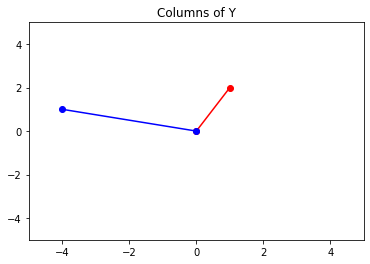

In [12]:
plt.plot((0,Y[0,0]), (0,Y[1,0]), 'ro-')
plt.plot((0,Y[0,1]), (0,Y[1,1]), 'bo-')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title("Columns of Y")
plt.show()

In [13]:
Q, R = qr_decomposition(Y)

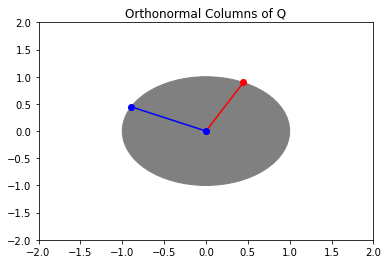

In [14]:
f, ax = plt.subplots(1)
ax.plot((0,Q[0,0]), (0,Q[1,0]), 'ro-')
ax.plot((0,Q[0,1]), (0,Q[1,1]), 'bo-')
ax.add_artist(plt.Circle((0, 0), 1, color="gray")) # Unit circle
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.title("Orthonormal Columns of Q")
plt.show()

The columns of Q are perpendicular to each other and they have unit length. 

## Question 3:

In [15]:
from scipy.linalg import hilbert

In [16]:
X = 1e-5*np.eye(200) + hilbert(200)

### a) 
Apply QR factorization that uses original Gram-Schmidt algorithm.

In [17]:
Q_original, R_original = qr_decomposition(X)

### b) 
Apply QR factorization that uses modified Gram-Schmidt algorithm.

In [18]:
def modified_gram_schmidt(matrix):
    transpose = np.copy(matrix).T
    
    Q = []
    
    for i in range(len(transpose)):
        
        column = transpose[i]
        
        q = column/l2_norm(column)
        Q.append(q)
        
        for j in range(i+1, len(transpose)):
            
            proj = np.dot(q.T, transpose[j])
            
            transpose[j] -= proj*q
        
    return np.array(Q).T


def modified_QR(matrix):
    Q = modified_gram_schmidt(matrix)
    R = np.dot(Q.T, matrix)
    
    return Q, R
    

In [19]:
Q_modified, R_modified = modified_QR(X)

### c)
Calculate the error: The value of the largest entry (in absolute value)

In [20]:
error_original = np.eye(200) - np.dot(Q_original.T, Q_original)

In [21]:
print("Error of original G-S Algorithm: {}".format(
np.max(np.abs(error_original))
))

Error of original G-S Algorithm: 1.6994325412308448e-11


In [22]:
error_modified = np.eye(200) - np.dot(Q_modified.T, Q_modified)

In [23]:
print("Error of modified G-S Algorithm: {}".format(
np.max(np.abs(error_modified))
))


Error of modified G-S Algorithm: 1.6994325412308448e-11


The both algoritms produced the same error which is very small. Thus we can say that those both algorithms works correctly and at the same performance in terms of accuracy. 

## Question 4:

In [24]:
import jax
import jaxlib
import jax.numpy as jnp

In [25]:
def f(x):
    return x**2 + 2*jnp.exp(x)

In [26]:
df = jax.grad(f) # The first derivative
ddf = jax.grad(df) # The second derivative
dddf = jax.grad(ddf) # The third derivative

In [27]:
# The following code is adopted from the lecture.
def plot_taylors(x, f, df, ddf, dddf):
    taylor0 = f(z) + 0*x
    taylor1 = f(z) + df(z)*(x-z)
    taylor2 = taylor1 + 0.5*ddf(z)*jnp.square(x-z)
    taylor3 = taylor2 + dddf(z)*jnp.power(x-z, 3)/6
    
    plt.plot(x, f(x), label="Function", linewidth=5)
    plt.plot(x, taylor0, label="0th Taylor", linewidth=5)
    plt.plot(x, taylor1, "--", label="1st Taylor", linewidth=5)
    plt.plot(x, taylor2, "-.", label="2nd Taylor", linewidth=5)
    plt.plot(x, taylor3, ":", label="3th Taylor", linewidth=5)
    plt.plot(z, f(z), "o", markersize=12, label="Reference point")
    plt.grid(True)
    plt.axis("equal")
    plt.legend(prop={'size': 15})

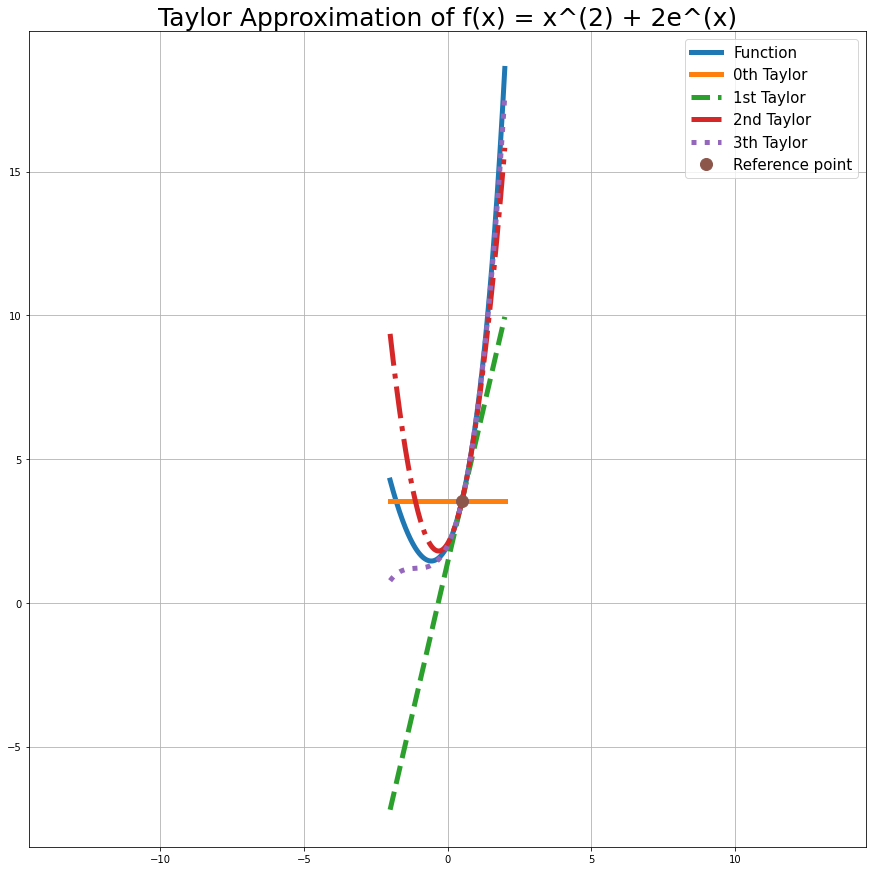

In [28]:
z = 0.5 
x = jnp.arange(-2.,2., 0.01)
plt.figure(figsize=(15,15))
plot_taylors(x, f, df, ddf, dddf)
plt.title("Taylor Approximation of f(x) = x^(2) + 2e^(x)", size=25)
plt.show()

## Question 5:

The hint provided from the original textbook (**Matrix Computations**) of the question is utilized. $ W = (C + D)(E - F)$

If we distribute the multiplication, we obtain:

$ A = CE - DF \newline$ 
$ B = CF + DE $

Then compute 
$\newline W = (C + D)(E - F) = CE - CF + DE - DF$ 
and 
$\newline X = (C - D)(E + F) = CE + CF - DE - DF$

Hence $W + X$ gives $2(CE - DF)$ which is equal to $2A$. We did **two matrix multiplications in total** while calculating the $W$ and $X$ and found the A.

Also see that:
$\newline
A - B - 2DE = CE - DF - CF - DE + 2DE = W 
$
Then, since we know the value of $W$ and $A$ now, we can find the value of $B$ by just computing $2DE$ which requires **one matrix multiplication**. 

In total, we applied **three matrix multiplication** by calculating $W$, $X$, and $DE$.  

## Question 6:

Since we are testing whether $\phi$ is a linear function we can treat it as a 3-vector $\begin{bmatrix}x & y & z\end{bmatrix}$.

$
\begin{bmatrix}
1 & 1 & 0
\end{bmatrix}^{T}
\begin{bmatrix}
x & y & z
\end{bmatrix}
= -1 \newline
\begin{bmatrix}
-1 & 1 & 1
\end{bmatrix}^{T}
\begin{bmatrix}
x & y & z
\end{bmatrix}
= 1 \newline
\begin{bmatrix}
1 & -1 & -1
\end{bmatrix}^{T}
\begin{bmatrix}
x & y & z
\end{bmatrix}
= 1
$

The function $\phi$ must satisfy the equations above. We compute those vector multiplications:

$
x + y = -1 \newline
-x + y + z = 1 \newline
x + -y + -z = 1
$

If we sum the second and the third row, they cancel out each other and we end up with an equation $ 0 = 2 $ which is wrong. Thus $\phi$ function **can not be linear.** 